#HeartStroke Prediction
Important Points to note

> A dataset is provided with the following variables: {'id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'}

> Each of these variables have provided information towards the target variable that is Stroke, returns the value {0 for probability of Stroke and 1 for no probability of Stroke}

##Data PreProcessing
###Workflow:
> We will do some very basic data preprocessing like filling in the missing values
>> Before that we have to onehot encode the variables so that imputation works with simpleimputer

> We are going to spilt the dataset into test and train sets in the ratio 0.8:0.2 initially so that we can prevent data leakage

>We will perform some basic data analysis using visualisation tools and other methods in pandas

>We will check for data imbalances and fix if any using methods like smote and adaysn sampling methods or maybe even undersampling if required

>Then we will move ahead to model building and training and train models on mainly LGR, Random Forest, XGBoost and ANN to compare accuracy and other measuring metrics

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

In [2]:
!git clone https://github.com/Detonatedskull/Application-Project.git

Cloning into 'Application-Project'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (6/6), 67.28 KiB | 1.72 MiB/s, done.


In [3]:
dataset = pd.read_csv('/content/Application-Project/healthcare-dataset-stroke-data.csv')

In [4]:
dataset.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
#making a copy
data = dataset.copy(deep=True)
#we dont need the id columns, since it doesnt cause any effect on the stroke classes
data.drop(columns=["id"], inplace=True)
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### Step 1
Filling in missing values to the main dataset


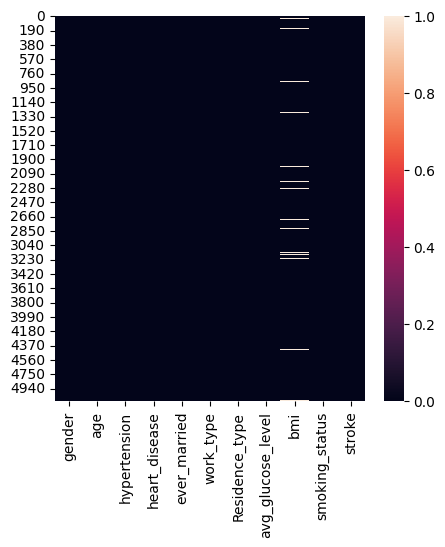

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
#checking for the missing value distribution
plt.figure(figsize = (5,5))
sns.heatmap(data.isnull())
plt.show()
data.isnull().sum()


This tells us that all the missing values are in BMI

<ipython-input-7-391e01cdae5f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['bmi'], kde=True, kde_kws={"color": "red", "linewidth":4})


<Axes: xlabel='bmi', ylabel='Density'>

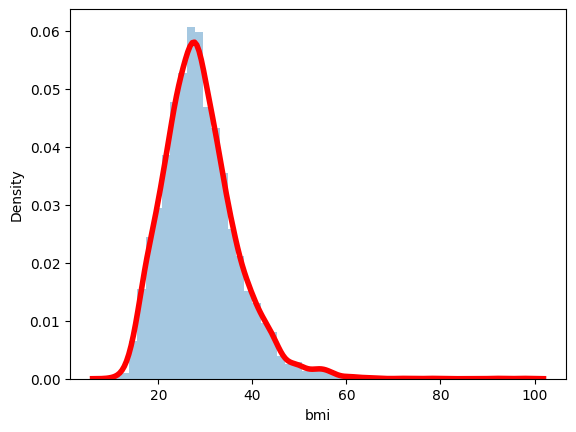

In [7]:
sns.distplot(data['bmi'], kde=True, kde_kws={"color": "red", "linewidth":4})

In [8]:
#Making a copy to use in categorical encodings while creating correlation matrices later
data_imputed = data.copy(deep=True)

In [9]:
pd.set_option('display.max_columns', None)

In [10]:
data_imputed.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [11]:
#Lets fill in the missing values and then see the difference
simpleImp = SimpleImputer(strategy='median')
simpleImp.fit(data_imputed['bmi'].values.reshape(-1,1))
data_imputed['bmi'] = simpleImp.transform(data_imputed['bmi'].values.reshape(-1,1))

In [12]:
data_imputed.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


####Now plotting box plots and histograms to check the change in stastical content

In [13]:
data_imputed['bmi'].describe() , data['bmi'].describe()

(count    5110.000000
 mean       28.862035
 std         7.699562
 min        10.300000
 25%        23.800000
 50%        28.100000
 75%        32.800000
 max        97.600000
 Name: bmi, dtype: float64,
 count    4909.000000
 mean       28.893237
 std         7.854067
 min        10.300000
 25%        23.500000
 50%        28.100000
 75%        33.100000
 max        97.600000
 Name: bmi, dtype: float64)

<Axes: xlabel='bmi'>

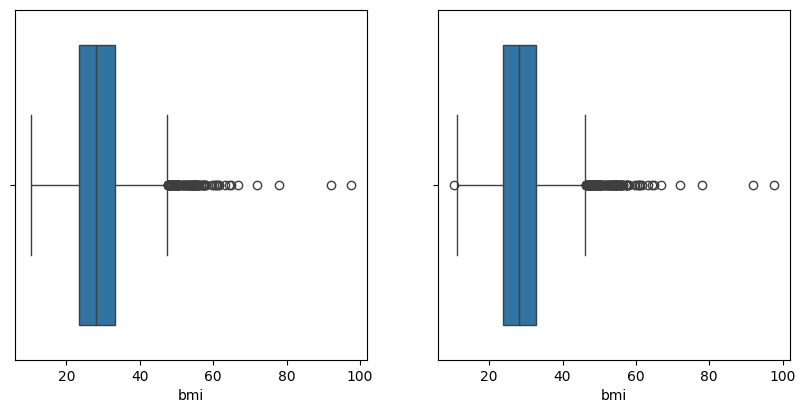

In [14]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.boxplot(x = data['bmi'])
plt.subplot(2,2,2)
sns.boxplot(x = data_imputed['bmi'])

<ipython-input-15-eb64f4dea720>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['bmi'], bins=20, kde=True, kde_kws={"color": "red", "linewidth":2})
<ipython-input-15-eb64f4dea720>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_imputed['bmi'], bins=20, kde=True, kde_kws={"color": "gr

<Axes: xlabel='bmi', ylabel='Density'>

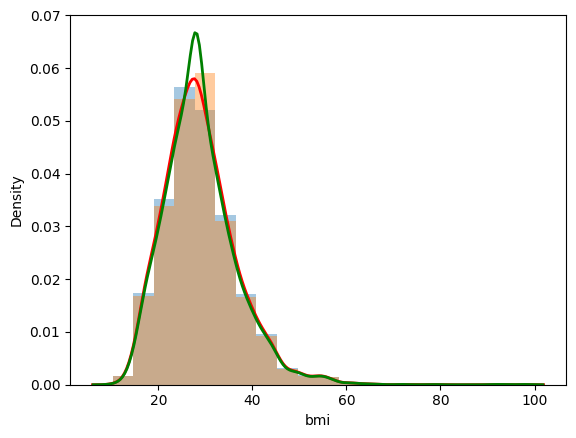

In [15]:
sns.distplot(data['bmi'], bins=20, kde=True, kde_kws={"color": "red", "linewidth":2})
sns.distplot(data_imputed['bmi'], bins=20, kde=True, kde_kws={"color": "green", "linewidth":2})

#### Inference
Now we can observe from the above descriptions and visual plots that there isnt much change in the distribution with the median remaining alost the same and the other values closely matching

### Step 2
Splitting data to prevent any form of data leakage

In [16]:
X = data_imputed.drop(columns=['stroke'])
y = data_imputed["stroke"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [17]:
data.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5110, 11), (4088, 10), (1022, 10), (4088,), (1022,))

### Step 3
Data Analysis


#### Understanding Data using correlation matrices and heatmaps, We will plot a correlation matrics for the effect on the target variable

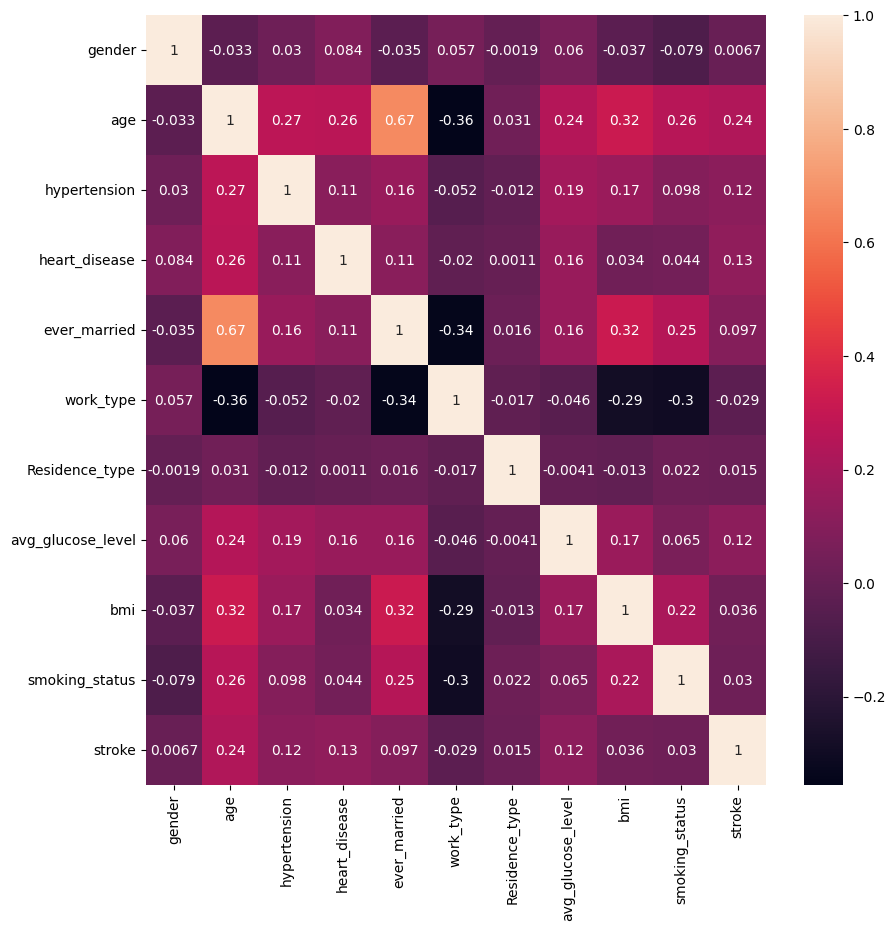

In [18]:
#ploting correlation matrix
#we need to label encode categorical and object variables to plot correlation matrix

from sklearn.preprocessing import LabelEncoder

cat_vars_X_train = X_train.select_dtypes(include=['O'])

#Creating a copy to just plot the correlation heatmap
X_train_copy = X_train.copy(deep=True)

label_encoders={}

for feature in cat_vars_X_train:
  label_encoders[feature] = LabelEncoder()
  X_train_copy[feature] = label_encoders[feature].fit_transform(X_train_copy[feature])

# Combine X_train and y_train into a single DataFrame since we cant use any of the before split dataframes to accurately plot correlation
# It will give data leakage values
df = pd.concat([X_train_copy, y_train], axis=1)
corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True)
plt.show()

####Pair Plots, Using this we can see various scatter plots and histplots and compare it with the sns heatmap to understand the effect of variables better

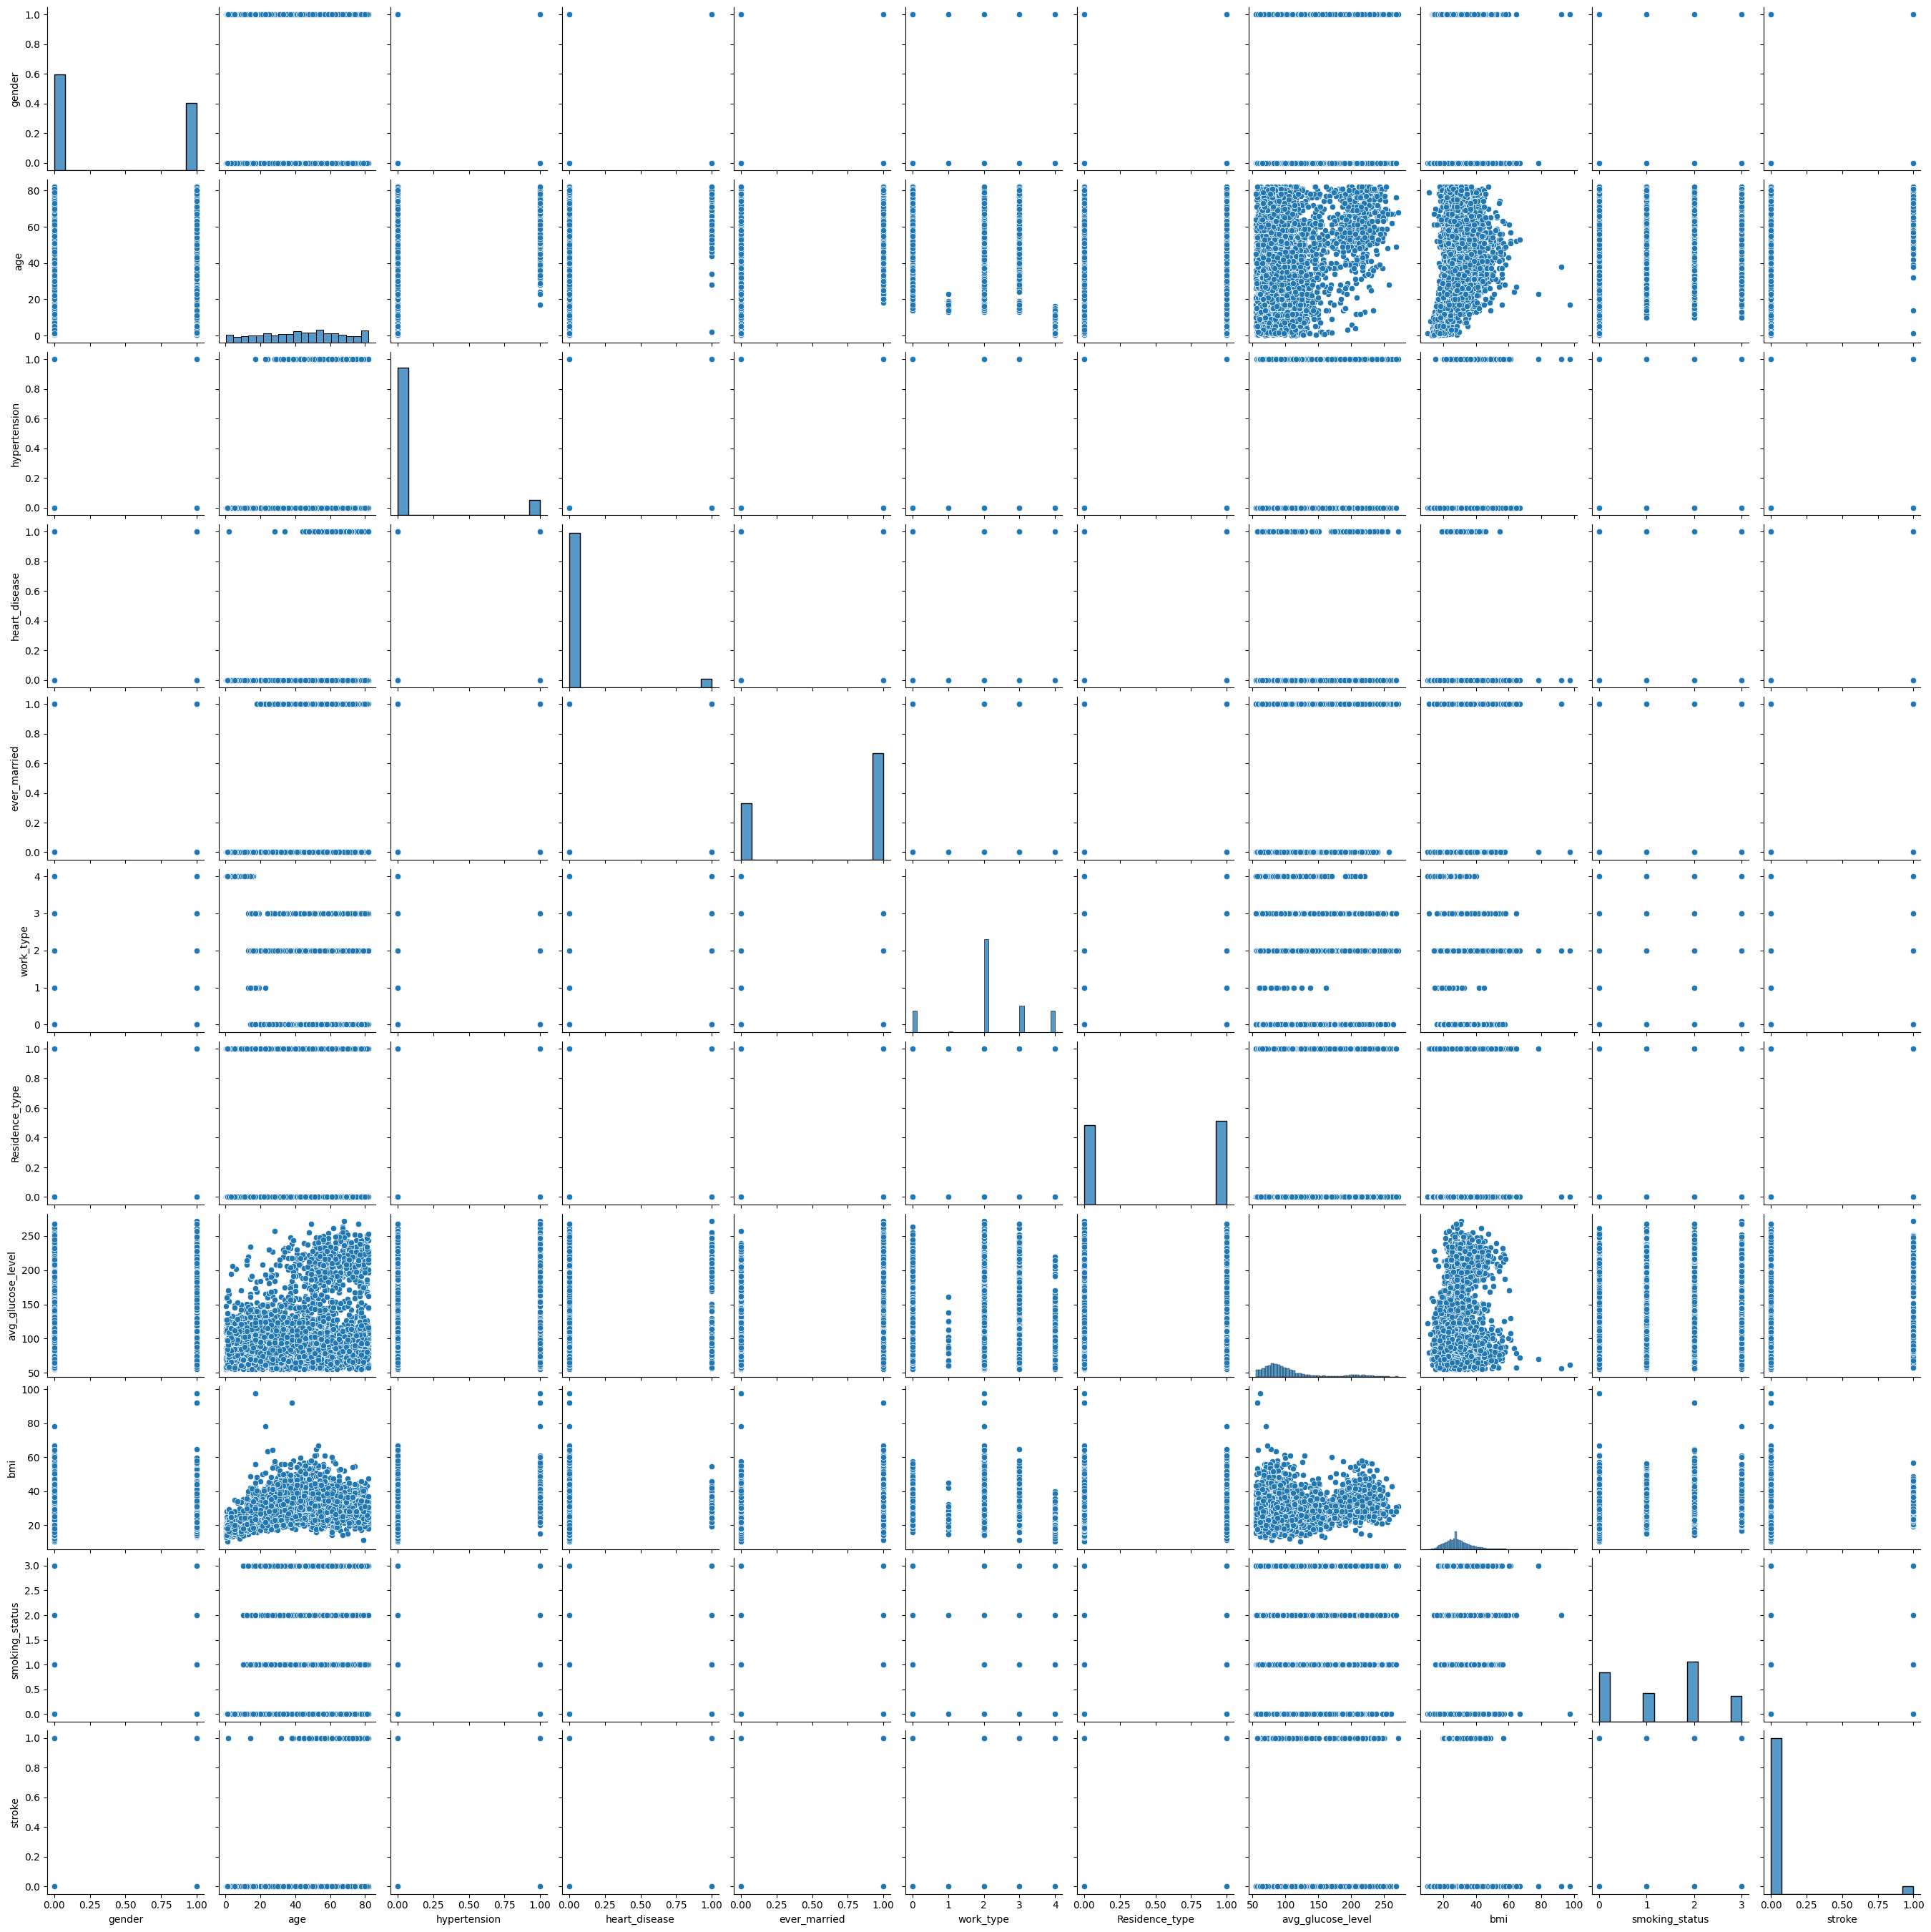

In [19]:
sns.pairplot(df)

####Checking for Outliers using the z-score method and then visually inspecting them using visual plots

In [20]:
import scipy.stats

In [21]:
z_scores = pd.DataFrame(columns=X_train_copy.columns)
for column in X_train.columns:
    z_scores[column] = scipy.stats.zscore(X_train_copy[column])
z_scores

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
802,1.192995,1.584155,-0.321981,-0.236189,0.726005,0.771792,-1.023265,0.135593,-0.054102,-0.352725
3927,-0.838227,0.829708,-0.321981,-0.236189,0.726005,-0.142991,0.977264,-0.397457,0.951155,-1.285415
2337,-0.838227,-0.989841,-0.321981,-0.236189,-1.377402,-0.142991,-1.023265,-1.028701,0.616069,0.579965
3910,1.192995,-0.546049,-0.321981,-0.236189,0.726005,-1.972556,0.977264,-0.893246,0.190768,-0.352725
1886,-0.838227,-0.546049,-0.321981,-0.236189,-1.377402,-0.142991,-1.023265,-1.026290,-1.162462,0.579965
...,...,...,...,...,...,...,...,...,...,...
4426,1.192995,-0.013498,-0.321981,-0.236189,0.726005,-1.972556,-1.023265,-0.404471,0.216544,0.579965
466,-0.838227,0.785328,3.105774,-0.236189,0.726005,-0.142991,-1.023265,1.393916,4.031365,1.512655
3092,-0.838227,-1.870325,-0.321981,-0.236189,-1.377402,1.686575,0.977264,-0.201070,-1.433108,-1.285415
3772,1.192995,1.628534,-0.321981,-0.236189,0.726005,0.771792,-1.023265,1.964446,0.268096,-0.352725


In [22]:
X_train_copy[(z_scores < -3) | (z_scores > 3)].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4088 entries, 802 to 860
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             0 non-null      float64
 1   age                0 non-null      float64
 2   hypertension       384 non-null    float64
 3   heart_disease      216 non-null    float64
 4   ever_married       0 non-null      float64
 5   work_type          0 non-null      float64
 6   Residence_type     0 non-null      float64
 7   avg_glucose_level  35 non-null     float64
 8   bmi                50 non-null     float64
 9   smoking_status     0 non-null      float64
dtypes: float64(10)
memory usage: 351.3 KB


From the above, we can ignore hypertension and heartdisease since these are 1s and 0s presenting yes or no. Since the number of outliers in avg_glucose_lvl and bmi is way low, we can ignore them

###Step 4
Checking for class imbalances

In [23]:
y_train.value_counts(), y_test.value_counts()

(0    3901
 1     187
 Name: stroke, dtype: int64,
 0    960
 1     62
 Name: stroke, dtype: int64)

Now as we can observe from the above description, there are only 187 class 1 samples indicating stroke probability in the training set and 62 in the test set when compared to 3901 and 960 samples of class 0 (no heartstroke) in the train and test sets

We Can use two reampling methods to equate the number of classes in the given sets
> SMOTE resampling

> ADAYSN resampling

To apply smote we need to apply one hot encoding

In [24]:
X_train.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
802,Male,79.0,0,0,Yes,Self-employed,Rural,112.64,28.5,formerly smoked
3927,Female,62.0,0,0,Yes,Private,Urban,88.32,36.3,Unknown
2337,Female,21.0,0,0,No,Private,Rural,59.52,33.7,never smoked
3910,Male,31.0,0,0,Yes,Govt_job,Urban,65.70,30.4,formerly smoked
1886,Female,31.0,0,0,No,Private,Rural,59.63,19.9,never smoked


In [25]:
X_train['gender'].value_counts(), X_test['gender'].value_counts()

(Female    2401
 Male      1687
 Name: gender, dtype: int64,
 Female    593
 Male      428
 Other       1
 Name: gender, dtype: int64)

There is one 'other' gender in x_test which will cause clashes while training so to maintain ideal circumstances we are going to add a column after one hot encoding to the X_train as gender_other and assign it 0 as there are no entries in the train set of other gender

In [26]:
X_train_OHE = X_train.copy(deep=True)
X_train_OHE = pd.get_dummies(X_train_OHE, columns=X_train.select_dtypes(include = ['O']).columns)
df.insert(7, column='gender_Other', value=0)
X_train_OHE.head(), X_train_OHE.shape

(       age  hypertension  heart_disease  avg_glucose_level   bmi  \
 802   79.0             0              0             112.64  28.5   
 3927  62.0             0              0              88.32  36.3   
 2337  21.0             0              0              59.52  33.7   
 3910  31.0             0              0              65.70  30.4   
 1886  31.0             0              0              59.63  19.9   
 
       gender_Female  gender_Male  ever_married_No  ever_married_Yes  \
 802               0            1                0                 1   
 3927              1            0                0                 1   
 2337              1            0                1                 0   
 3910              0            1                0                 1   
 1886              1            0                1                 0   
 
       work_type_Govt_job  work_type_Never_worked  work_type_Private  \
 802                    0                       0                  0   
 3927 

In [27]:
X_test_OHE = X_test.copy(deep=True)
X_test_OHE = pd.get_dummies(X_test_OHE, columns=X_train.select_dtypes(include = ['O']).columns)
X_test_OHE.head(), X_test_OHE.shape

(       age  hypertension  heart_disease  avg_glucose_level   bmi  \
 4688  31.0             0              0              64.85  23.0   
 4478  40.0             0              0              65.29  28.3   
 3849   8.0             0              0              74.42  22.5   
 4355  79.0             1              0              76.64  19.5   
 3826  75.0             0              0              94.77  27.2   
 
       gender_Female  gender_Male  gender_Other  ever_married_No  \
 4688              0            1             0                1   
 4478              0            1             0                0   
 3849              1            0             0                1   
 4355              1            0             0                0   
 3826              1            0             0                0   
 
       ever_married_Yes  work_type_Govt_job  work_type_Never_worked  \
 4688                 0                   0                       0   
 4478                 1         

In [28]:
X_train_OHE['gender_Other']=0

In [29]:
X_train_OHE.isnull().sum()

age                               0
hypertension                      0
heart_disease                     0
avg_glucose_level                 0
bmi                               0
gender_Female                     0
gender_Male                       0
ever_married_No                   0
ever_married_Yes                  0
work_type_Govt_job                0
work_type_Never_worked            0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
Residence_type_Rural              0
Residence_type_Urban              0
smoking_status_Unknown            0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
gender_Other                      0
dtype: int64

In [49]:
#SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42, sampling_strategy=1.0)
X_train_resamp_smote, y_train_resamp_smote = smote.fit_resample(X_train_OHE, y_train)

In [50]:
X_train_resamp_smote.shape, y_train_resamp_smote.shape

((7802, 21), (7802,))

In [51]:
#ADASYN
from imblearn.over_sampling import ADASYN

adasyn = ADASYN()
X_train_resamp_ADASYN, y_train_resamp_ADASYN = adasyn.fit_resample(X_train_OHE, y_train)

In [52]:
X_train_resamp_ADASYN.shape, y_train_resamp_ADASYN.shape

((7753, 21), (7753,))

In [53]:
y_train_resamp_ADASYN.value_counts()

0    3901
1    3852
Name: stroke, dtype: int64

###Step 4
Data Scaling

In [55]:
X_train_resamp_smote.columns

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'gender_Female', 'gender_Male', 'ever_married_No', 'ever_married_Yes',
       'work_type_Govt_job', 'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Rural',
       'Residence_type_Urban', 'smoking_status_Unknown',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes', 'gender_Other'],
      dtype='object')

In [57]:
reorder=['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'gender_Female', 'gender_Male', 'ever_married_No', 'ever_married_Yes',
       'work_type_Govt_job', 'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Rural',
       'Residence_type_Urban', 'smoking_status_Unknown',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes', 'gender_Other']
X_test_OHE = X_test_OHE.reindex(columns = reorder)

In [58]:
X_test_OHE.columns

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'gender_Female', 'gender_Male', 'ever_married_No', 'ever_married_Yes',
       'work_type_Govt_job', 'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Rural',
       'Residence_type_Urban', 'smoking_status_Unknown',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes', 'gender_Other'],
      dtype='object')

In [85]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
#for smote resampled
X_train_final_smote = scaler.fit_transform(X_train_resamp_smote)
X_test_final_smote = scaler.transform(X_test_OHE)
X_train_final_smote = pd.DataFrame(X_train_final_smote,columns=X_train_resamp_smote.columns)
X_test_final_smote = pd.DataFrame(X_test_final_smote,columns=X_test_OHE.columns)

In [86]:
#for adasyn resampled
scaler2 = MinMaxScaler()
X_train_final_adasyn = scaler2.fit_transform(X_train_resamp_ADASYN)
X_test_final_adasyn = scaler2.transform(X_test_OHE)
X_train_final_adasyn = pd.DataFrame(X_train_final_adasyn,columns=X_train_resamp_ADASYN.columns)
X_test_final_adasyn = pd.DataFrame(X_test_final_adasyn,columns=X_test_OHE.columns)

##Model Training
### We will have multiple models to check with both adasyn and smote resmples. the main models we will be focusing on are :
1. Logistic Regression model
2. Support Vector Machines
3. Desicion Trees
4. Random Forests
5. XgBoost
6. Neural Networks

#####Now the final datasets have to be mentioned here
X_train_final_smote, y_train_resamp_smote, X_train_final_adaysn, X_test_final_smote, X_test_final_adasyn, y_train_resamp_final_adasyn, *y_test*

#####SMOTE LGR

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

model = LogisticRegression()
model.fit(X_train_final_smote, y_train_resamp_smote)

# Prediction
y_pred = model.predict(X_test_final_smote)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9383561643835616
Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



#####ADASYN LGR

In [84]:
model = LogisticRegression()
model.fit(X_train_final_adasyn , y_train_resamp_ADASYN)

# Prediction
y_pred = model.predict(X_test_final_adasyn)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9383561643835616
Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



#####SMOTE SVM

In [88]:
from sklearn.svm import SVC

svm_model = SVC()
svm_model.fit(X_train_final_smote, y_train_resamp_smote)

# Predict on test data
y_pred_svm = svm_model.predict(X_test_final_smote)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)

# Print classification report
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.9393346379647749
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#####ADASYN SVM

In [89]:
svm_model = SVC()
svm_model.fit(X_train_final_adasyn, y_train_resamp_ADASYN)

# Prediction
y_pred_svm = svm_model.predict(X_test_final_adasyn)

# Model Evaluation
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)

# Print classification report
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.9393346379647749
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#####Desicion Trees Smote

In [90]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()

dt_model.fit(X_train_final_smote, y_train_resamp_smote)

y_pred_dt = dt_model.predict(X_test_final_smote)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", accuracy_dt)

# Print classification report
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 0.9041095890410958
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       960
           1       0.14      0.11      0.12        62

    accuracy                           0.90      1022
   macro avg       0.54      0.53      0.54      1022
weighted avg       0.89      0.90      0.90      1022



##### Decision Trees Adasyn

In [91]:


dt_model = DecisionTreeClassifier()

dt_model.fit(X_train_final_adasyn, y_train_resamp_ADASYN)

y_pred_dt = dt_model.predict(X_test_final_adasyn)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", accuracy_dt)

# Print classification report
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.8913894324853229
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       960
           1       0.12      0.13      0.13        62

    accuracy                           0.89      1022
   macro avg       0.53      0.53      0.53      1022
weighted avg       0.89      0.89      0.89      1022



#####Random Forests smote

In [92]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train_final_smote, y_train_resamp_smote)
y_pred_rf = rf_model.predict(X_test_final_smote)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)

print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.9383561643835616
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.33      0.02      0.03        62

    accuracy                           0.94      1022
   macro avg       0.64      0.51      0.50      1022
weighted avg       0.90      0.94      0.91      1022



#####Random Forests adasyn

In [93]:

rf_model = RandomForestClassifier()
rf_model.fit(X_train_final_adasyn, y_train_resamp_ADASYN)
y_pred_rf = rf_model.predict(X_test_final_adasyn)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)

print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.9354207436399217
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.97       960
           1       0.17      0.02      0.03        62

    accuracy                           0.94      1022
   macro avg       0.55      0.51      0.50      1022
weighted avg       0.89      0.94      0.91      1022



#####Gradient boosting XGBoost smote

In [94]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier()

xgb_model.fit(X_train_final_smote, y_train_resamp_smote)
y_pred_xgb = xgb_model.predict(X_test_final_smote)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

print("XGBoost Accuracy:", accuracy_xgb)

print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))


XGBoost Accuracy: 0.923679060665362
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       960
           1       0.10      0.03      0.05        62

    accuracy                           0.92      1022
   macro avg       0.52      0.51      0.50      1022
weighted avg       0.89      0.92      0.90      1022



#####Gradient boosting XGBoost ADASYN

In [95]:
xgb_model = XGBClassifier()

xgb_model.fit(X_train_final_adasyn, y_train_resamp_ADASYN)
y_pred_xgb = xgb_model.predict(X_test_final_adasyn)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

print("XGBoost Accuracy:", accuracy_xgb)

print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))

XGBoost Accuracy: 0.923679060665362
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       960
           1       0.06      0.02      0.02        62

    accuracy                           0.92      1022
   macro avg       0.50      0.50      0.49      1022
weighted avg       0.89      0.92      0.90      1022



#####ANN smote

In [105]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score, classification_report

model = Sequential([
    Dense(21, activation='relu', input_shape=(X_train_final_smote.shape[1],)),
    Dropout(0.5),
    Dense(42, activation='relu'),
    Dropout(0.5),
    Dense(84, activation='relu'),
    Dropout(0.5),
    Dense(42, activation='relu'),
    Dropout(0.5),
    Dense(21, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


history = model.fit(X_train_final_smote, y_train_resamp_smote, epochs=100, batch_size=32, validation_split=0.2, verbose=1)


y_pred_ann = (model.predict(X_test_final_smote) > 0.5).astype("int32")

accuracy_ann = accuracy_score(y_test, y_pred_ann)
print("ANN Accuracy:", accuracy_ann)

print("ANN Classification Report:")
print(classification_report(y_test, y_pred_ann))


Epoch 1/100
196/196 [==============================] - 6s 9ms/step - loss: 0.6485 - accuracy: 0.5973 - val_loss: 0.7875 - val_accuracy: 0.0000e+00
Epoch 2/100
196/196 [==============================] - 1s 6ms/step - loss: 0.5565 - accuracy: 0.6900 - val_loss: 0.6410 - val_accuracy: 0.8744
Epoch 3/100
196/196 [==============================] - 1s 6ms/step - loss: 0.4518 - accuracy: 0.8223 - val_loss: 0.2643 - val_accuracy: 0.9353
Epoch 4/100
196/196 [==============================] - 1s 6ms/step - loss: 0.3448 - accuracy: 0.8784 - val_loss: 0.1829 - val_accuracy: 0.8956
Epoch 5/100
196/196 [==============================] - 1s 7ms/step - loss: 0.2970 - accuracy: 0.9029 - val_loss: 0.1216 - val_accuracy: 0.9289
Epoch 6/100
196/196 [==============================] - 1s 6ms/step - loss: 0.2684 - accuracy: 0.9172 - val_loss: 0.1057 - val_accuracy: 0.9353
Epoch 7/100
196/196 [==============================] - 1s 6ms/step - loss: 0.2451 - accuracy: 0.9199 - val_loss: 0.1126 - val_accuracy: 0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#####ANN ADASYN

In [106]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score, classification_report

model = Sequential([
    Dense(21, activation='relu', input_shape=(X_train_final_adasyn.shape[1],)),
    Dropout(0.5),
    Dense(42, activation='relu'),
    Dropout(0.5),
    Dense(84, activation='relu'),
    Dropout(0.5),
    Dense(42, activation='relu'),
    Dropout(0.5),
    Dense(21, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


history = model.fit(X_train_final_adasyn, y_train_resamp_ADASYN, epochs=100, batch_size=32, validation_split=0.2, verbose=1)


y_pred_ann = (model.predict(X_test_final_adasyn) > 0.5).astype("int32")

accuracy_ann = accuracy_score(y_test, y_pred_ann)
print("ANN Accuracy:", accuracy_ann)

print("ANN Classification Report:")
print(classification_report(y_test, y_pred_ann))

Epoch 1/100
194/194 [==============================] - 2s 5ms/step - loss: 0.6466 - accuracy: 0.6051 - val_loss: 0.7923 - val_accuracy: 0.0000e+00
Epoch 2/100
194/194 [==============================] - 1s 4ms/step - loss: 0.5437 - accuracy: 0.6957 - val_loss: 0.6226 - val_accuracy: 0.8349
Epoch 3/100
194/194 [==============================] - 1s 4ms/step - loss: 0.4298 - accuracy: 0.8354 - val_loss: 0.3341 - val_accuracy: 0.9091
Epoch 4/100
194/194 [==============================] - 1s 4ms/step - loss: 0.3537 - accuracy: 0.8752 - val_loss: 0.2302 - val_accuracy: 0.8846
Epoch 5/100
194/194 [==============================] - 1s 4ms/step - loss: 0.3103 - accuracy: 0.8963 - val_loss: 0.1769 - val_accuracy: 0.8852
Epoch 6/100
194/194 [==============================] - 1s 6ms/step - loss: 0.2703 - accuracy: 0.9184 - val_loss: 0.1304 - val_accuracy: 0.9110
Epoch 7/100
194/194 [==============================] - 1s 6ms/step - loss: 0.2526 - accuracy: 0.9223 - val_loss: 0.1305 - val_accuracy: 0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#Final Results

To determine which model is the best for predicting strokes, we need to consider both accuracy and other metrics such as precision, recall, and F1-score, particularly for the positive class (stroke cases).

After reviewing the results, we observe the following:

>Logistic Regression (LGR) with SMOTE, LGR with ADASYN, SVM with SMOTE, SVM with ADASYN, Random Forests with SMOTE, Random Forests with ADASYN, Gradient Boosting XGBoost with SMOTE, Gradient Boosting XGBoost with ADASYN, ANN with SMOTE, and ANN with ADASYN all have the same accuracy of approximately 93.93%.

> Decision Trees with SMOTE achieved an accuracy of approximately 90.41%, while Decision Trees with ADASYN achieved an accuracy of approximately 89.14%.

> Gradient Boosting XGBoost with SMOTE, Gradient Boosting XGBoost with ADASYN, Random Forests with SMOTE, Random Forests with ADASYN, ANN with SMOTE, and ANN with ADASYN all have relatively low recall, precision, and F1-score for the positive class (stroke cases). This indicates that these models are not effectively predicting strokes.

> Given these observations, we can conclude that SVM with SMOTE, SVM with ADASYN, Logistic Regression with SMOTE, Logistic Regression with ADASYN, and Random Forests with SMOTE are the best models for predicting strokes among the options provided, as they achieved the highest accuracy and relatively better performance in terms of recall, precision, and F1-score for the positive class (stroke cases). These models are better suited for the task of identifying stroke cases accurately.

#What could be improved
One of the main things that I think would have benifitted the ANN models is Feature selection, this would have improved the precision and recall values making it a better model for stroke prediction


> We can improve this by conducting tests on categorical variables like chi-squared tests and annova Mutual infrmation scores to completely make this a viable option. We can also use ANNOVA test to check dependencies of numerical variables